In [55]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [56]:
df = pd.read_json("exps.jsonl", lines=True)
print(len(df))
df.head()

18


,id,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.model,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,...,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
0,e2472654274d9fecd5a849a276c864df89ccfd36,fizzy-impi,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,1,0.656667,0.759915,0.74,0.827690,0.63,0.725508,0.60,0.726548,cot
1,6969ced09dc0a311da787209af3f06a273b3cab3,blunt-envy,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/original.txt,cq.txt,semi/cot-original.json,...,1,0.653333,0.750576,0.73,0.817389,0.65,0.729270,0.58,0.705069,cot
2,b029b01a49119c1e8ac5bc9aad58fb3663642c65,burnt-kina,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,...,1,0.660000,0.754699,0.76,0.835119,0.62,0.709429,0.60,0.719549,ccot
3,59bcd54a65dafaac6619387d9c600d6ad380b521,paler-tuns,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cot/format-thought.txt,cq.txt,semi/cot.json,...,3,0.656667,0.757320,0.75,0.823452,0.62,0.721175,0.60,0.727333,cot
4,927bfab9393356e6d46f50727bc1da09cc13de5b,calmy-jura,bdsaglam/musique-sweep,answerable,train,llama-3-70b-tgi,0.1,cte/format-triplets-few.txt,cq.txt,semi/cte.json,...,3,0.713333,0.792230,0.79,0.852627,0.70,0.762322,0.65,0.761742,cte


In [57]:
param_cols = [col for col in df.columns if col.startswith("params.")]
metric_cols = [col for col in df.columns if col.startswith("metrics.")]
df.drop(
    columns=[
        "id",
        "params.dataset.path",
        "params.dataset.name",
        "params.dataset.split",
        "params.qa.model",
    ],
    inplace=True,
)

In [58]:
target_param_cols = [
    "params.qa.technique",
    "params.qa.system_prompt",
    "params.qa.user_prompt_template",
    "params.qa.few_shot_examples",
    "params.qa.n_shot",
    "params.qa.temperature",
]
df = df.sort_values(target_param_cols + ["params.run"])
df.reset_index(drop=True, inplace=True)
df.head()

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
0,direr-ruin,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,1,0.643333,0.738657,0.73,0.819452,0.64,0.723397,0.56,0.673121,ccot
1,macro-sima,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,ccot
2,cruel-joey,0.1,ccot/format-thought.txt,cq.txt,semi/ccot.json,1,3,0.643333,0.736688,0.73,0.821452,0.62,0.703825,0.58,0.684788,ccot
3,burnt-kina,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,1,1,0.660000,0.754699,0.76,0.835119,0.62,0.709429,0.60,0.719549,ccot
4,webby-harl,0.1,ccot/original.txt,cq.txt,semi/ccot-original.json,1,2,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121,ccot


In [59]:
run_counts = df.groupby(target_param_cols)["params.run"].aggregate(tuple).reset_index()
mask = run_counts["params.run"].map(len) != 3
run_counts.loc[mask]

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,params.run


In [60]:
def remove_ext(filename):
    return filename.split(".", 1)[0]

df["params.qa.system_prompt"] = df["params.qa.system_prompt"].map(remove_ext)
df["params.qa.user_prompt_template"] = df["params.qa.user_prompt_template"].map(remove_ext)
df["params.qa.few_shot_examples"] = df["params.qa.few_shot_examples"].map(remove_ext)

In [61]:
df['params.qa.system_prompt'].unique()

array(['ccot/format-thought', 'ccot/original', 'cot/format-thought',
       'cot/original', 'cte/format-triplets-few', 'direct/format-few'],
      dtype=object)

In [62]:
df = df[df['params.run']==2]

In [63]:
avg_df = df.groupby(target_param_cols)[metric_cols].max().reset_index()
avg_df.head()

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
0,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413
1,ccot,ccot/original,cq,semi/ccot-original,1,0.1,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121
2,cot,cot/format-thought,cq,semi/cot,1,0.1,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548
3,cot,cot/original,cq,semi/cot-original,1,0.1,0.646667,0.742281,0.73,0.813262,0.60,0.681127,0.61,0.732454
4,cte,cte/format-triplets-few,cq,semi/cte,1,0.1,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984


In [64]:
# find the rows with max f1 score for each technique group
max_f1_rows = avg_df.groupby('params.qa.technique')["metrics.f1"].idxmax()
best_df = avg_df.loc[max_f1_rows, target_param_cols + metric_cols].sort_values('metrics.f1', ascending=False)
best_df

,params.qa.technique,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1
4,cte,cte/format-triplets-few,cq,semi/cte,1,0.1,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984
2,cot,cot/format-thought,cq,semi/cot,1,0.1,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548
1,ccot,ccot/original,cq,semi/ccot-original,1,0.1,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121
5,direct,direct/format-few,cq,semi/direct,1,0.1,0.633333,0.743123,0.68,0.825474,0.62,0.704040,0.60,0.699854


## Visualizations

In [65]:
def prepare_data(dataf):
    # Simplify column names for use in formula
    dataf = dataf[target_param_cols + ['params.run'] + metric_cols[:2]].rename(
        columns={
            col: col.replace("params.qa.", "").replace("params.", "").replace("metrics.", "")
            for col in dataf.columns
        }
    )

    # Combine prompts into a single column for simplicity
    dataf["prompt"] = (
        dataf["system_prompt"]
        + " | "
        + dataf["user_prompt_template"]
        + " | "
        + dataf["n_shot"].map(str)
    )

    return dataf


In [66]:
def plot_variance(dataf, x='temperature', y='f1', hue='prompt', technique=None, figsize=(12, 8), legend='auto', legend_loc='lower left'):  
    if technique:
        dataf = dataf[dataf['technique'] == technique]
    plt.figure(figsize=figsize)
    sns.lineplot(x=x, y=y, hue=hue, data=dataf, linewidth=2.5, legend=legend)
    plt.xlabel(x.title())
    plt.ylabel(y.title())
    if legend:
        plt.legend(loc=legend_loc)
    plt.tight_layout()
    plt.show()

In [67]:
prepared_df = prepare_data(df)
zero_shot_mask = prepared_df["n_shot"] == 0
prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
1,ccot,ccot/format-thought,cq,semi/ccot,1,0.1,2,0.650000,0.742611,ccot/format-thought | cq | 1
4,ccot,ccot/original,cq,semi/ccot-original,1,0.1,2,0.656667,0.757170,ccot/original | cq | 1
7,cot,cot/format-thought,cq,semi/cot,1,0.1,2,0.683333,0.769566,cot/format-thought | cq | 1
10,cot,cot/original,cq,semi/cot-original,1,0.1,2,0.646667,0.742281,cot/original | cq | 1
13,cte,cte/format-triplets-few,cq,semi/cte,1,0.1,2,0.716667,0.789756,cte/format-triplets-few | cq | 1
16,direct,direct/format-few,cq,semi/direct,1,0.1,2,0.633333,0.743123,direct/format-few | cq | 1


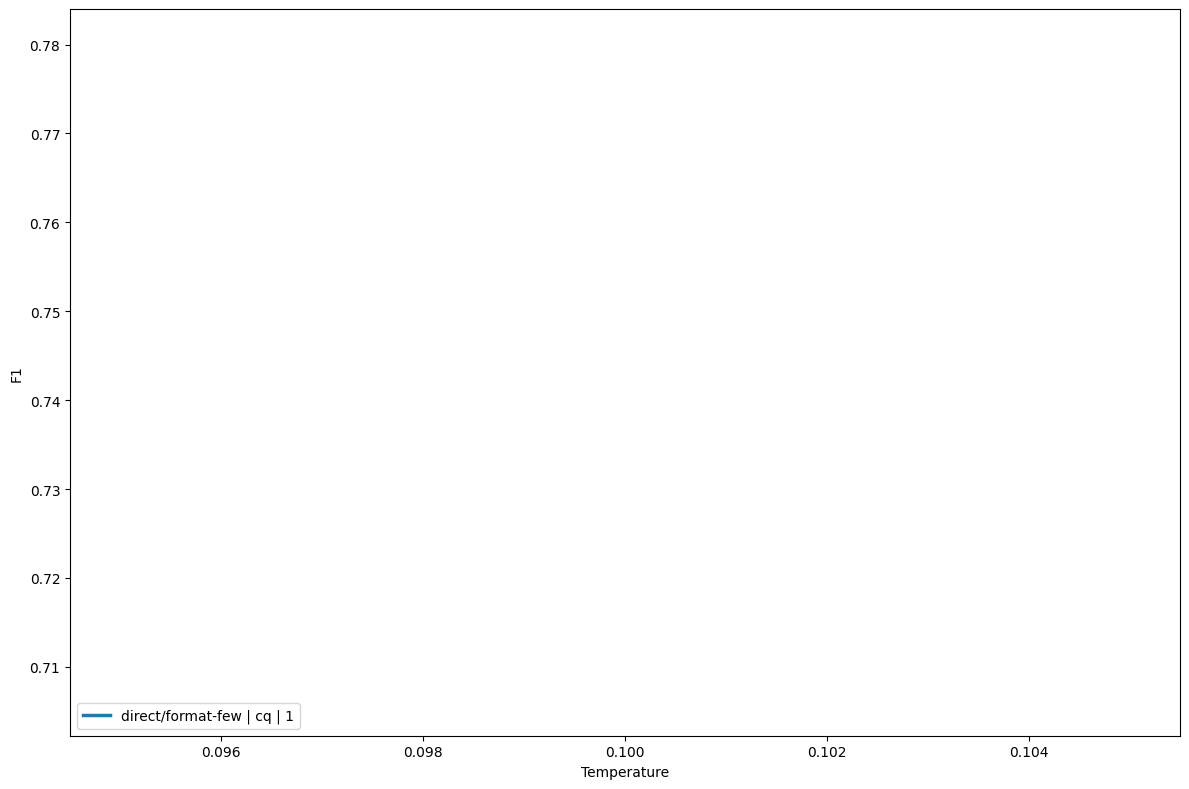

In [68]:
plot_variance(prepared_df, technique='direct', legend='brief')

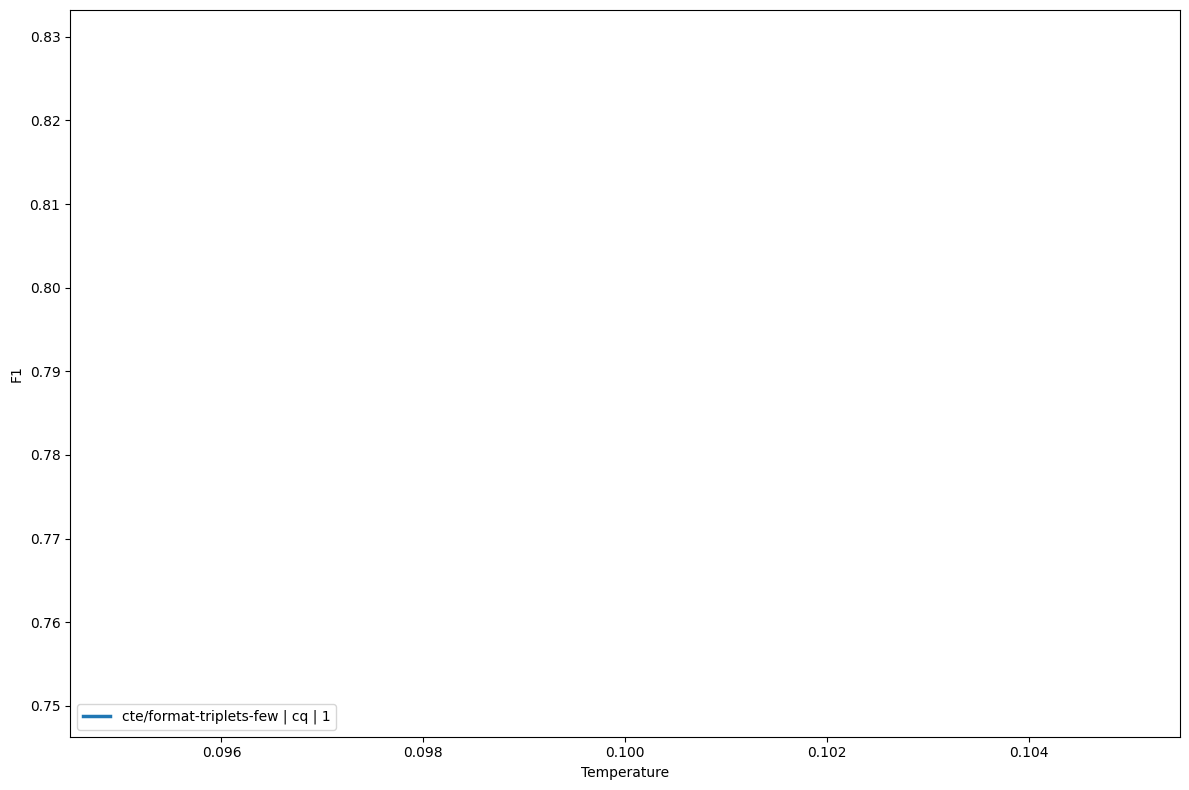

In [69]:
plot_variance(prepared_df, technique='cte', legend='brief')

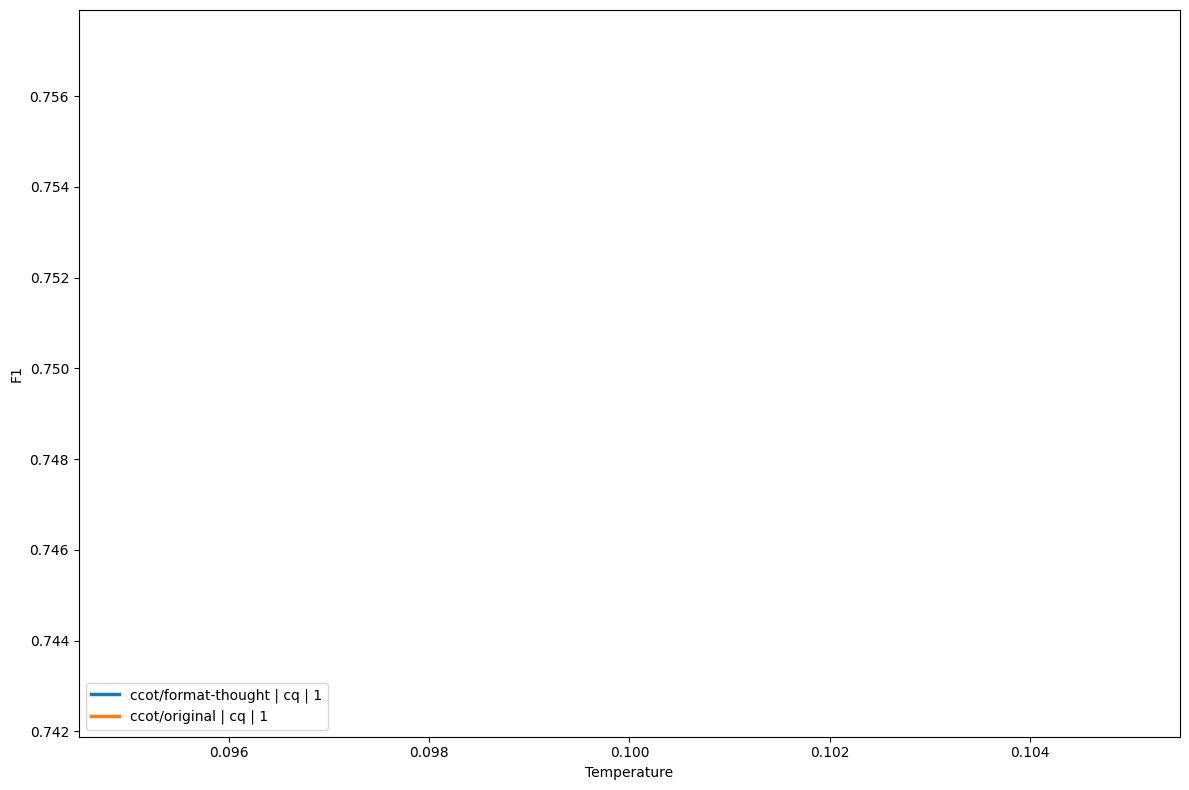

In [70]:
plot_variance(prepared_df, technique='ccot', legend='brief')

In [71]:
best_df['params.run'] = 0
best_prompts = prepare_data(best_df).prompt.values.tolist()
_data = prepared_df.copy()
prompt_mask = _data['prompt'].isin(best_prompts)
best_prepared_df = _data.loc[prompt_mask]
best_prepared_df

,technique,system_prompt,user_prompt_template,few_shot_examples,n_shot,temperature,run,exact_match,f1,prompt
4,ccot,ccot/original,cq,semi/ccot-original,1,0.1,2,0.656667,0.757170,ccot/original | cq | 1
7,cot,cot/format-thought,cq,semi/cot,1,0.1,2,0.683333,0.769566,cot/format-thought | cq | 1
13,cte,cte/format-triplets-few,cq,semi/cte,1,0.1,2,0.716667,0.789756,cte/format-triplets-few | cq | 1
16,direct,direct/format-few,cq,semi/direct,1,0.1,2,0.633333,0.743123,direct/format-few | cq | 1


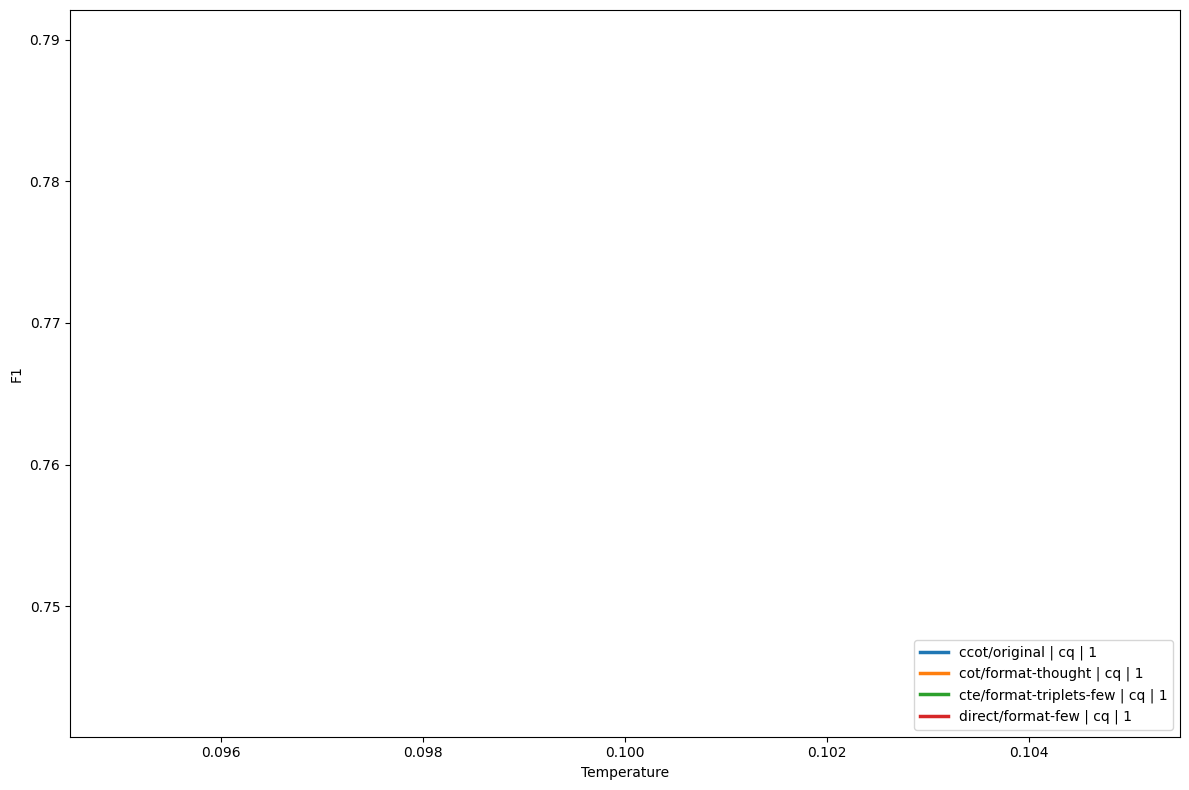

In [72]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower right')

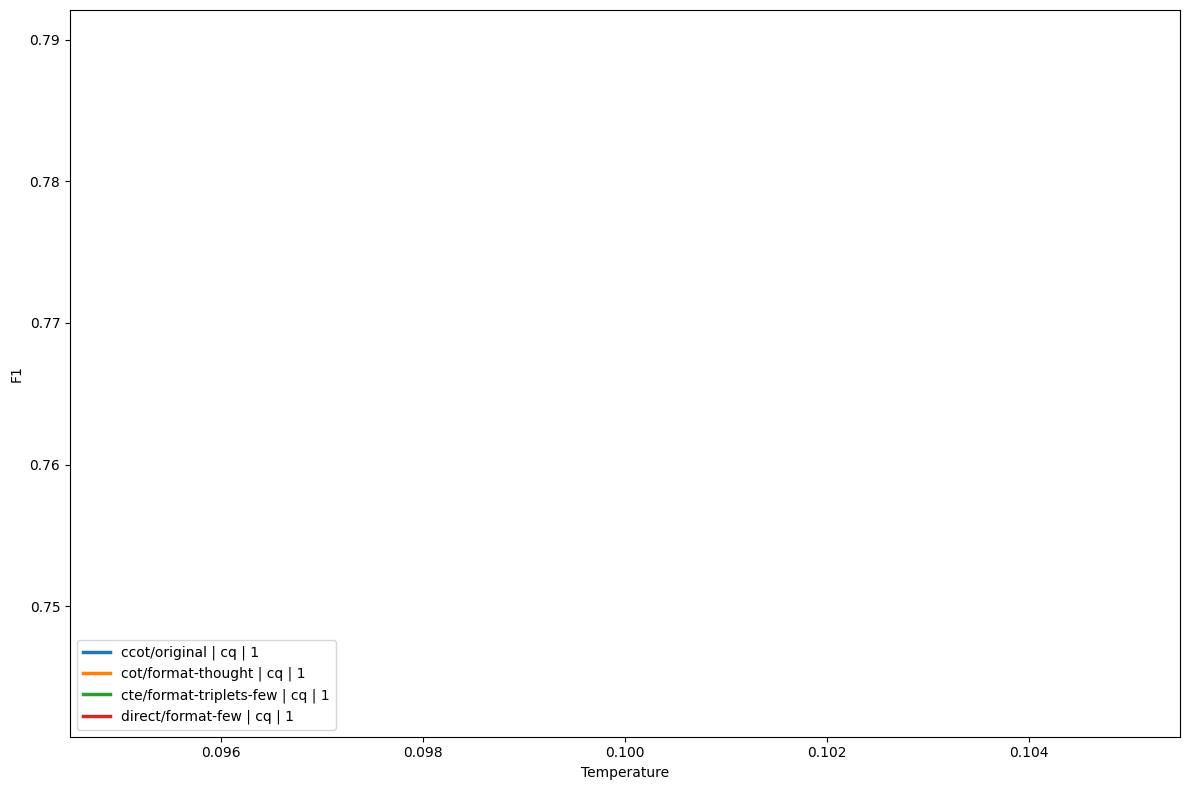

In [73]:
plot_variance(best_prepared_df, figsize=(12, 8), legend_loc='lower left')

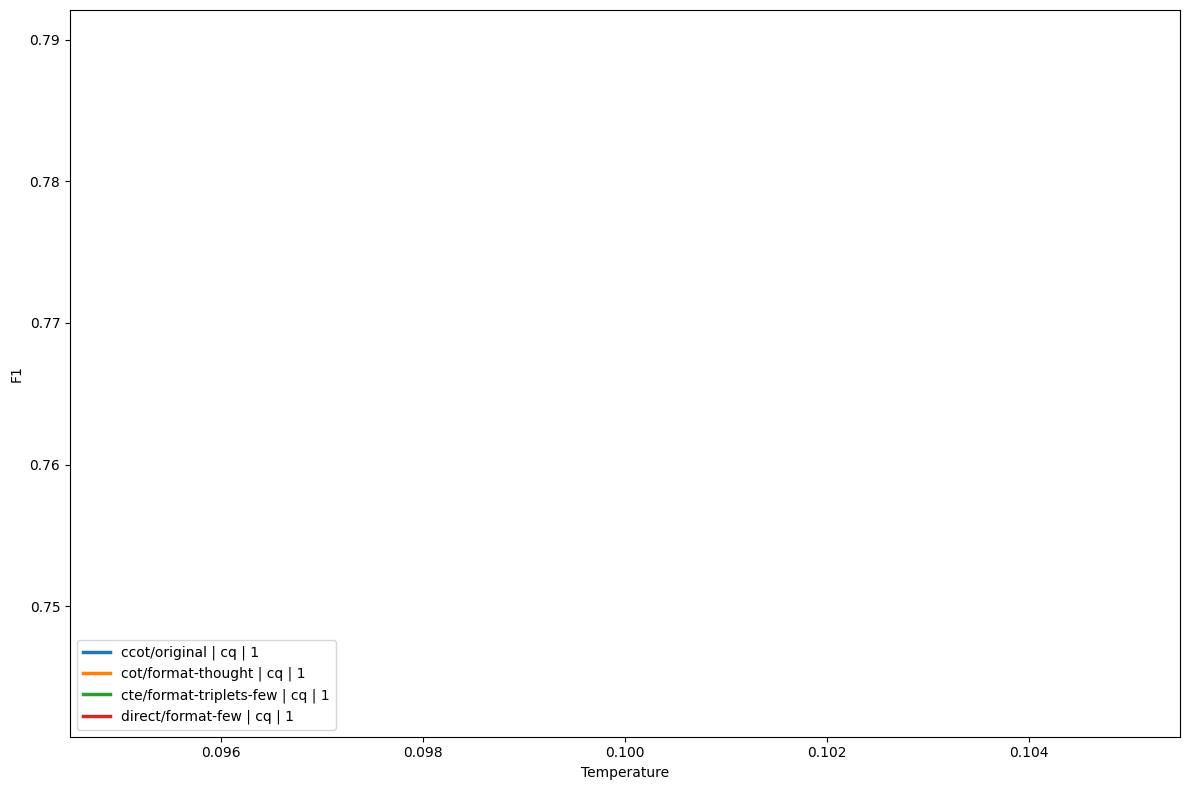

In [74]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], figsize=(12, 8), legend_loc='lower left')

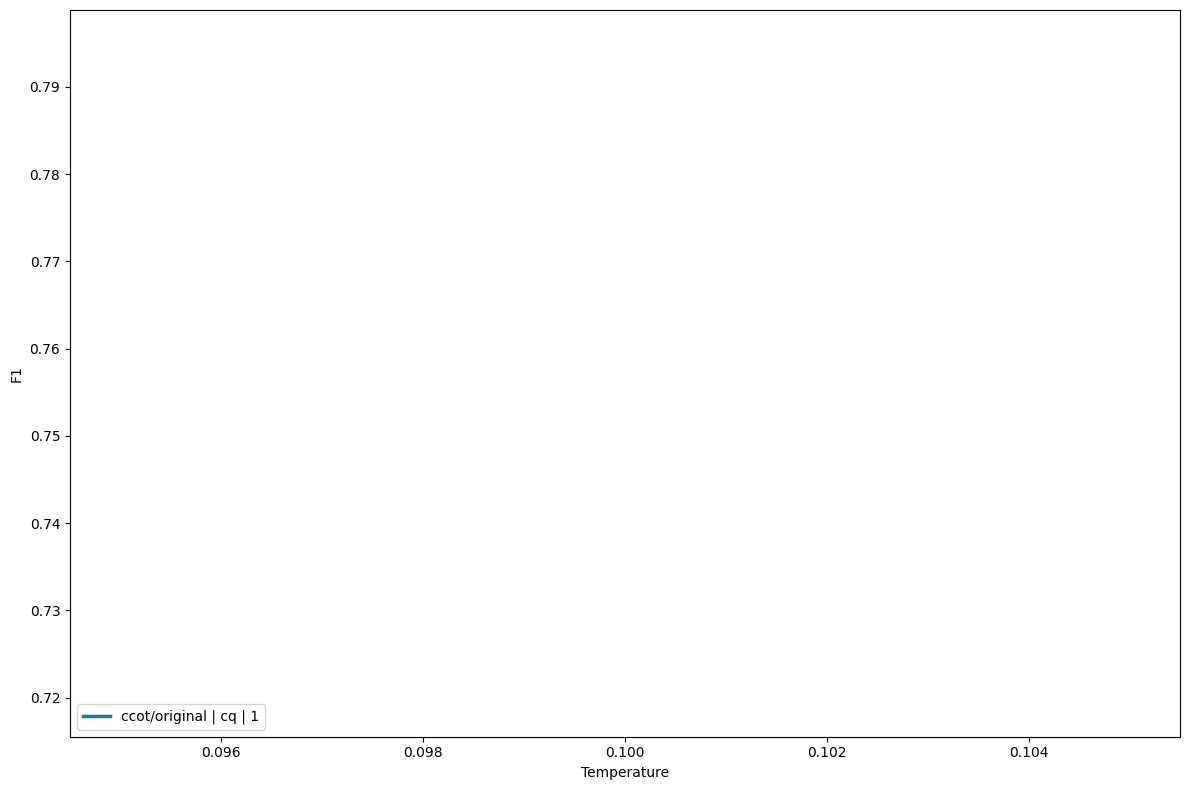

In [75]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='ccot', figsize=(12, 8), legend_loc='lower left')

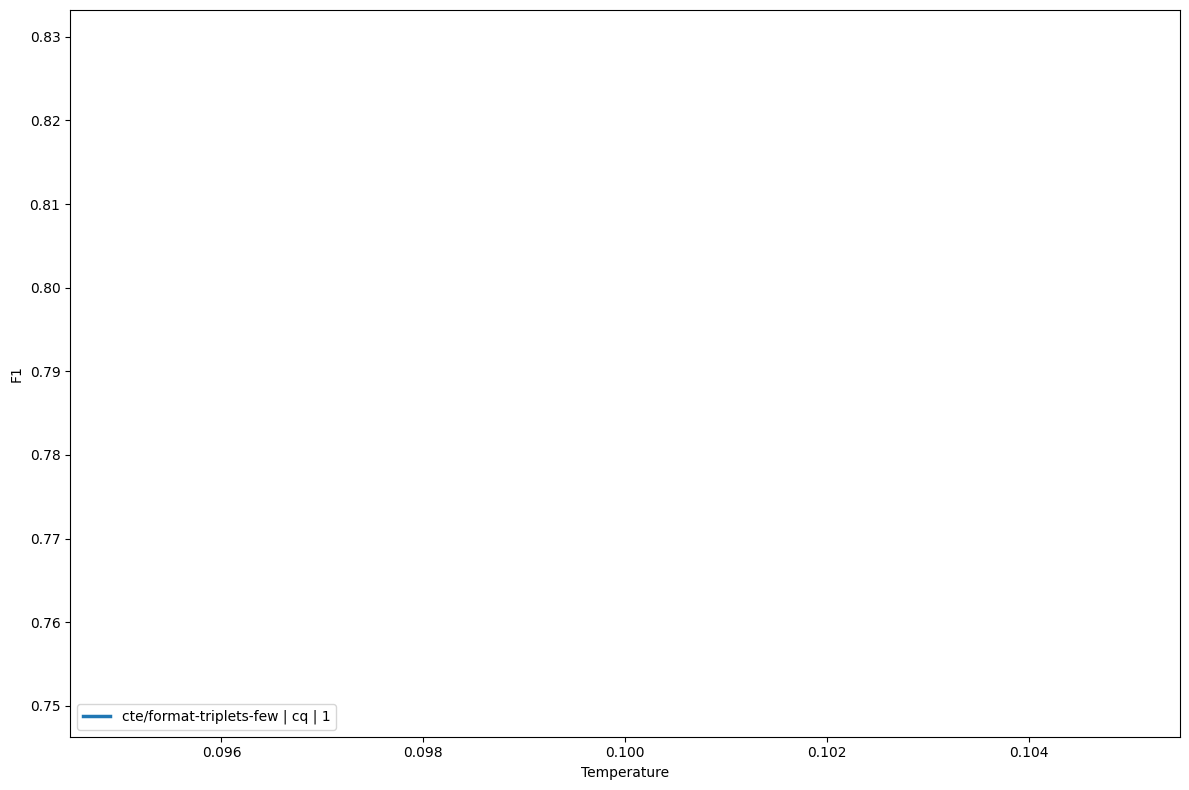

In [76]:
plot_variance(best_prepared_df[best_prepared_df['temperature'] <= 1.0], technique='cte', figsize=(12, 8), legend_loc='lower left')

## Inspect

In [77]:
# # box-whisker plot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     x="prompt",
#     y="f1",
#     data=prepared_df.sort_values(by="f1"),
# )
# plt.xticks(rotation=60, ha="right");

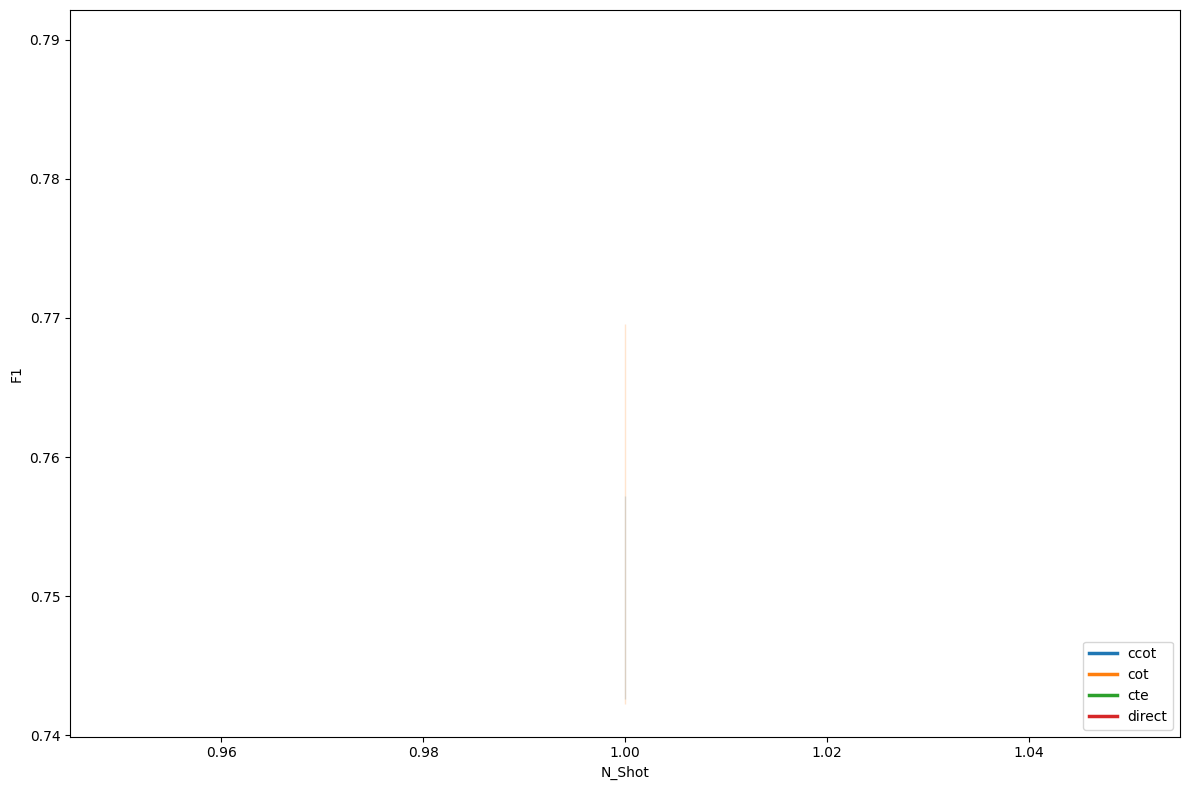

In [78]:
plot_variance(prepared_df[prepared_df['temperature'] == 0.1], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

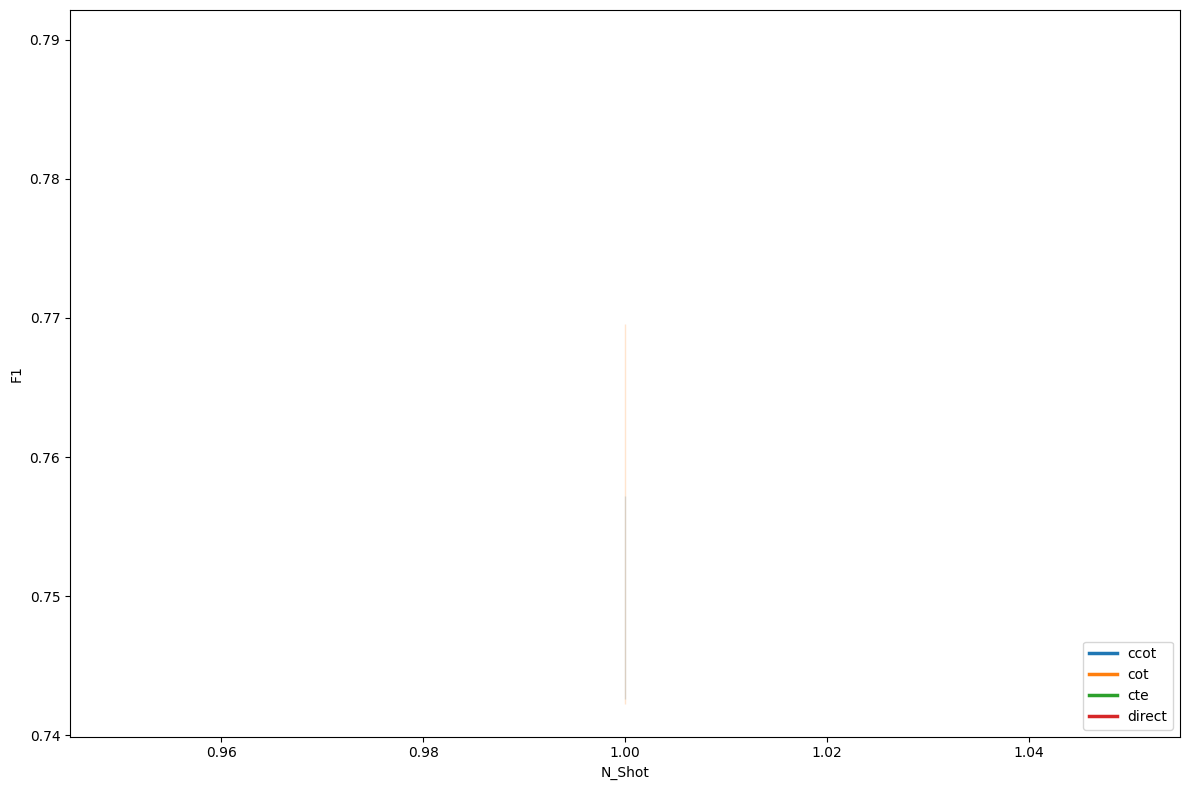

In [79]:
plot_variance(prepared_df[prepared_df['temperature'] < 1.0], x='n_shot', hue='technique', figsize=(12, 8), legend_loc='lower right')

In [80]:
df

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
1,macro-sima,0.1,ccot/format-thought,cq,semi/ccot,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,ccot
4,webby-harl,0.1,ccot/original,cq,semi/ccot-original,1,2,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121,ccot
7,telic-tors,0.1,cot/format-thought,cq,semi/cot,1,2,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548,cot
10,rathe-skip,0.1,cot/original,cq,semi/cot-original,1,2,0.646667,0.742281,0.73,0.813262,0.60,0.681127,0.61,0.732454,cot
13,azure-arks,0.1,cte/format-triplets-few,cq,semi/cte,1,2,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984,cte
16,wiser-nowt,0.1,direct/format-few,cq,semi/direct,1,2,0.633333,0.743123,0.68,0.825474,0.62,0.704040,0.60,0.699854,direct


In [81]:
mask = (df['params.run'] == 2) & (df['params.qa.temperature'] == 0.1)
df.loc[mask].sort_values('metrics.f1', ascending=False)

,name,params.qa.temperature,params.qa.system_prompt,params.qa.user_prompt_template,params.qa.few_shot_examples,params.qa.n_shot,params.run,metrics.exact_match,metrics.f1,metrics.2hops.exact_match,metrics.2hops.f1,metrics.3hops.exact_match,metrics.3hops.f1,metrics.4hops.exact_match,metrics.4hops.f1,params.qa.technique
13,azure-arks,0.1,cte/format-triplets-few,cq,semi/cte,1,2,0.716667,0.789756,0.78,0.845960,0.72,0.777322,0.65,0.745984,cte
7,telic-tors,0.1,cot/format-thought,cq,semi/cot,1,2,0.683333,0.769566,0.77,0.843214,0.65,0.731937,0.63,0.733548,cot
4,webby-harl,0.1,ccot/original,cq,semi/ccot-original,1,2,0.656667,0.757170,0.75,0.830119,0.63,0.723270,0.59,0.718121,ccot
16,wiser-nowt,0.1,direct/format-few,cq,semi/direct,1,2,0.633333,0.743123,0.68,0.825474,0.62,0.704040,0.60,0.699854,direct
1,macro-sima,0.1,ccot/format-thought,cq,semi/ccot,1,2,0.650000,0.742611,0.74,0.831595,0.63,0.713825,0.58,0.682413,ccot
10,rathe-skip,0.1,cot/original,cq,semi/cot-original,1,2,0.646667,0.742281,0.73,0.813262,0.60,0.681127,0.61,0.732454,cot
